# Unit 5 - Financial Planning

In [445]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [446]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [447]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [448]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [543]:
# Fetch current BTC price
data_btc = requests.get(btc_url).json() #pull data from url
# Fetch current ETH price
data_eth = requests.get(eth_url).json()
# Compute current value of my crpto
#print(data_btc) 
value_btc = data_btc['data']['1']['quotes']['USD']['price'] #find value of btc and eth from data set
#print(value_btc) #check if btc price correct
value_eth = data_eth['data']['1027']['quotes']['USD']['price']
#print(value_eth)
my_btc_value = value_btc*my_btc #crypto currency current value
my_eth_value = value_eth*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24988.80
The current value of your 5.3 ETH is $6178.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [544]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [545]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY") #getenv to retrive environment values
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#print(alpaca_api_key, alpaca_secret_key) #check if keys are correct
# Create the Alpaca API object
api = tradeapi.REST( 
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [546]:
# Format current date as ISO format
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars( #get_bars method creating a df for portfolio
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# Separate closing price with corresponding ticker using .loc
df_portfolio_spy = df_portfolio.loc[df_portfolio['symbol']=='SPY', ['close']] 
df_portfolio_agg = df_portfolio.loc[df_portfolio['symbol']=='AGG', ['close']]
df_portfolio_spy.columns = ['SPY'] #rename closing price to ticker symbol for both tickers
df_portfolio_agg.columns = ['AGG']
# Concatenate the ticker DataFrames
df_combined = pd.concat([df_portfolio_spy, df_portfolio_agg], axis="columns", join="inner") #joining agg and spy datasets
# Preview DataFrame
df_combined #data has been cleaned

,SPY,AGG
timestamp,,
2017-05-01 04:00:00+00:00,238.68,108.73
2017-05-02 04:00:00+00:00,238.77,108.88
2017-05-03 04:00:00+00:00,238.48,108.77
2017-05-04 04:00:00+00:00,238.76,108.68
2017-05-05 04:00:00+00:00,239.70,108.70
...,...,...
2022-07-01 04:00:00+00:00,381.24,102.34
2022-07-05 04:00:00+00:00,381.96,102.53
2022-07-06 04:00:00+00:00,383.25,101.84


In [547]:
# Pick AGG and SPY close prices
spy_close_price = df_combined['SPY'].iloc[-1] #select the last closing date as the current value (last row)
agg_close_price = df_combined['AGG'].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $101.23
Current SPY closing price: $388.67


In [548]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price 
my_agg_value = my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19433.50
The current value of your 200 AGG shares is $20246.00


### Savings Health Analysis

In [549]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = {"current value": [my_btc_value+my_eth_value, my_spy_value+my_agg_value]} #dataset of portfolio

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=["Crypto", "Shares"]) #enter dataset into a dataframe (column name included in dataset above)

# Display savings DataFrame
display(df_savings)

,current value
Crypto,31167.275
Shares,39679.500


array([<AxesSubplot:ylabel='current value'>], dtype=object)

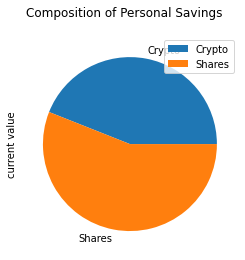

In [550]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True, title='Composition of Personal Savings')

In [551]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = int(df_savings.sum()) #change to type int for if statement
remaining_goal = emergency_fund-total_savings
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough in your emergency fund")
elif total_savings==emergency_fund:
    print("Congratulations, you have reached this financial goal")
else:
    print(f"You have ${remaining_goal} remaining from reaching this financial goal")

Congratulations, you have enough in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [552]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [553]:
# Get 5 years' worth of historical data for SPY and AGG
df_sim = api.get_bars( #5 years of historical data stored
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
spy = df_sim[df_sim ["symbol"]=="SPY"].drop("symbol", axis=1) #ticker data separated 
agg = df_sim[df_sim ["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([spy, agg], axis=1, keys=["SPY","AGG"])#joining agg and spy datasets

# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [554]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
my_projection = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [555]:
# Printing the simulation input data
my_projection.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [556]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
my_projection.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\mfiaa\Desktop\FinTech Bootcamp\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993975,0.996004,0.999528,1.003430,1.006658,1.003985,0.999834,1.009369,0.999903,1.006859,...,0.993725,1.007812,1.002988,1.000516,0.980954,1.010384,1.007853,1.002417,0.986956,0.982728
2,1.001109,0.990674,0.995937,1.006621,1.008001,1.001891,1.000222,1.010159,1.002186,1.001147,...,0.993254,1.010672,1.009535,1.013075,0.981406,0.997871,1.009056,0.994572,0.985838,0.977827
3,0.992168,0.986337,0.994444,0.998571,1.014569,0.998743,0.996617,1.011733,1.007021,1.009983,...,0.984873,1.000558,0.996743,1.017742,0.972609,1.002082,0.994783,0.999241,0.986852,0.981604
4,0.989199,0.991805,0.994737,0.990913,1.011914,0.996604,0.985287,1.021757,1.023790,1.018324,...,0.977856,1.001721,1.002962,1.022941,0.983780,1.008744,0.996179,0.987809,0.990154,0.980821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.423969,21.276404,7.621925,20.714263,23.412605,14.426440,9.075583,19.816703,15.537444,27.876341,...,6.592648,34.207711,48.097336,25.520794,47.538670,13.067311,26.435997,45.292914,42.504963,36.473420
7557,11.537248,21.377892,7.682648,20.578853,23.567606,14.438659,9.059835,19.831102,15.634181,28.068021,...,6.593343,34.236135,48.700383,25.687535,47.525846,13.170987,26.306022,45.481497,42.712484,36.184362
7558,11.537053,21.551467,7.658963,20.491347,23.286285,14.420182,9.000526,19.985917,15.722891,28.195883,...,6.683271,34.442649,48.905408,25.755890,47.903581,13.175738,26.183000,45.801564,42.329108,36.322006
7559,11.619365,21.446601,7.690742,20.402513,23.433956,14.333520,9.040250,19.969070,15.783227,28.151349,...,6.632414,34.835463,48.246185,25.659440,47.767878,13.151711,26.595672,45.951824,42.169957,36.312223


In [557]:
# Plot simulation outcomes
line_plot = my_projection.plot_simulation() #line plot

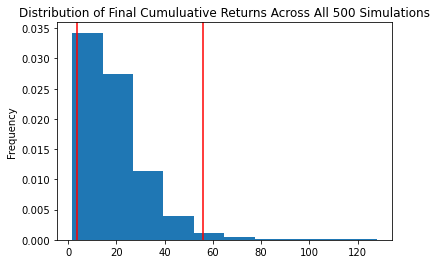

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = my_projection.plot_distribution() #dist plot


### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = my_projection.summarize_cumulative_return() #summary statistics

# Print summary statistics
print(tbl)

count           500.000000
mean             19.694018
std              14.398445
min               1.689071
25%              10.276135
50%              16.171668
75%              25.420998
max             127.786938
95% CI Lower      3.833640
95% CI Upper     55.808516
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2) #lower and upper bounds for expected value with 95% confidence interval
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76672.79 and $1116170.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $115009.19 and $1674255.49


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
my_projection_five = MCSimulation( #set 5 year forecast to a riskier weight
    portfolio_data = df_stock_data,
    weights = [.9, .1],
    num_simulation = 500,
    num_trading_days = 252*5
)
my_projection_five.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
my_projection_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\mfiaa\Desktop\FinTech Bootcamp\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993416,0.984442,1.004948,0.991616,0.993089,1.001348,1.006447,0.988211,0.996214,0.978151,...,0.999660,0.997609,1.004641,0.985265,0.995727,1.020630,1.000200,1.000467,0.996507,1.003201
2,0.998575,0.996020,0.995086,0.999714,0.993427,0.990537,0.996223,0.972716,1.010299,0.969436,...,1.005325,0.981988,1.000631,0.992951,0.981256,1.024343,0.991220,0.988955,0.999120,1.017355
3,1.000673,0.988953,1.003959,0.988182,0.994602,1.004612,0.997263,0.962250,1.034239,0.963587,...,0.990348,0.970618,0.977694,0.986252,0.979172,1.029325,0.984851,0.985867,0.995894,1.018882
4,1.000143,1.017456,0.983933,0.988897,0.990748,0.981757,1.013820,0.966031,1.047086,0.953510,...,0.998167,0.988059,0.975521,0.973108,0.972347,1.021313,0.991999,0.995338,0.993211,1.004177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.115383,2.110739,2.359236,1.499543,4.317617,2.192870,3.261444,2.814622,1.122419,4.378572,...,2.002946,2.533612,1.930123,1.833544,1.307970,1.577748,2.048825,3.763301,1.375554,1.467138
1257,2.091047,2.103367,2.366066,1.462142,4.361579,2.175991,3.225295,2.843099,1.130895,4.297927,...,2.042994,2.535620,1.932952,1.839744,1.302448,1.598312,2.065537,3.760534,1.373832,1.458280
1258,2.063584,2.102128,2.406982,1.477684,4.383434,2.176358,3.231470,2.871493,1.144110,4.260875,...,2.018577,2.496234,1.883024,1.826113,1.293369,1.585236,2.087160,3.774556,1.365643,1.456526
1259,2.060505,2.107057,2.398913,1.455444,4.343666,2.180054,3.211488,2.912924,1.147453,4.266646,...,2.011275,2.475212,1.906005,1.834170,1.277447,1.574090,2.103280,3.787137,1.343242,1.443967


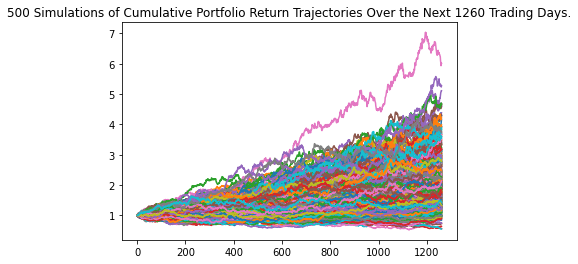

In [ ]:
# Plot simulation outcomes
line_plot_five = my_projection_five.plot_simulation()

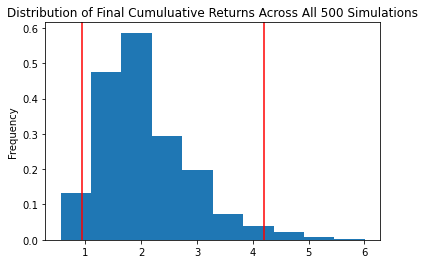

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_five = my_projection_five.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = my_projection_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              2.071614
std               0.821393
min               0.553194
25%               1.498888
50%               1.952151
75%               2.451382
max               6.009170
95% CI Lower      0.934324
95% CI Upper      4.201383
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5yr[8]*initial_investment,2)
ci_upper_five = round(tbl_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18686.47 and $84027.66


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
my_projection_ten = MCSimulation( #set the 10 year outlook to slightly less riskier then 5 yera
    portfolio_data = df_stock_data,
    weights = [.8, .2],
    num_simulation = 500,
    num_trading_days = 252*5
)
my_projection_ten.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
my_projection_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\mfiaa\Desktop\FinTech Bootcamp\UTOR-VIRT-FIN-PT-05-2022-U-LOLC-main\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995397,1.002874,0.984570,1.008925,0.998024,0.988330,0.992620,1.001020,0.971396,0.995171,...,0.998854,1.004893,1.002663,1.000111,1.003290,0.987145,0.996123,1.002119,1.016045,0.997707
2,0.999879,0.995305,0.991976,1.004447,0.990775,0.993135,0.999263,0.994383,0.963959,0.994347,...,0.994187,1.019984,1.001735,0.998165,0.999093,0.993518,0.980184,1.011572,1.025475,0.985509
3,1.011416,1.001568,1.001325,1.005414,0.994054,1.005376,0.988239,0.984299,0.971369,0.995143,...,0.994598,1.018505,1.018089,1.004772,0.992098,0.985865,0.964855,1.004257,1.006715,0.995440
4,1.018343,1.015709,1.018872,1.016864,1.000065,1.003431,1.002606,1.013371,0.958740,0.992810,...,0.995096,1.004843,1.030729,1.002779,0.977623,0.986032,0.967235,1.004050,1.021372,1.000449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.962788,1.979729,2.169691,2.307147,1.422223,2.555943,1.841158,2.261885,2.397964,2.430572,...,2.010651,2.830054,1.548227,1.228249,3.289969,1.473027,1.862046,1.058603,1.296816,1.927008
1257,1.952402,1.947016,2.174151,2.344418,1.414050,2.559750,1.837971,2.272588,2.407374,2.409685,...,1.990751,2.847993,1.563864,1.231335,3.310434,1.469554,1.886530,1.047102,1.288773,1.944780
1258,1.971511,1.965761,2.177207,2.345840,1.392128,2.585843,1.834069,2.263474,2.388258,2.374230,...,2.004485,2.855092,1.577566,1.220662,3.299457,1.478600,1.872701,1.066837,1.300688,1.957342
1259,1.982111,1.953860,2.143144,2.304735,1.375167,2.587302,1.871817,2.247267,2.393576,2.325444,...,2.015370,2.867391,1.560182,1.229060,3.322478,1.466595,1.862198,1.083458,1.294213,1.957651


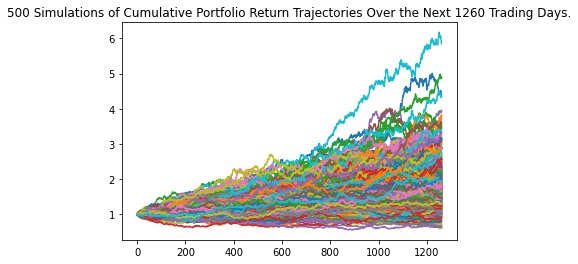

In [ ]:
# Plot simulation outcomes
line_plot_ten = my_projection_ten.plot_simulation()

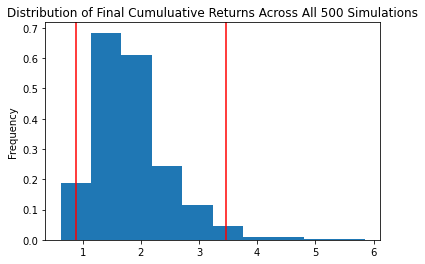

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_ten = my_projection_ten.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten_yr = my_projection_ten.summarize_cumulative_return()
# Print summary statistics
print(tbl_ten_yr)

count           500.000000
mean              1.842232
std               0.660927
min               0.619514
25%               1.403928
50%               1.716826
75%               2.146291
max               5.851306
95% CI Lower      0.891963
95% CI Upper      3.456535
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten_yr[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten_yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $17839.26 and $69130.71


Is an early retirement possible with the same portfolio?

The comparison done above shows a 30 year portfolio, with 60/40 portfolio of stocks and bonds. More weight was given to the stocks for a 5 and 10 year analysis to see if higher risk would give an early retirement. A portfolio with 90/10 weighting with a 5 year timeframe and a 80/20 weighting with a 10 year timeframe. And let's assume a 400% return on investment is required for an early retirement. Here is the following analysis:

For 30 year:

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76672.79 and $1116170.33

For 5 year:
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18686.47 and $84027.66

For 10 year:

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $17839.26 and $69130.71

The chance of making a 400% return reduces significantly when increasing risk and reducing the timeframe. The 30 year portfolio shows a return averaging from almost 400% to 5000%. While both the 5 and 10 year portfolio give risk of a negative return (on the lower bound), to a 300-400% return. The 5 year portfolio also gives the chance of an early retirment, while the 10 year portfolio doesn't. Also worth noting that the average performance of the 5 year is better then the 10 year. Showing that having a higher risk portfolio doesn't equate to higher returns over the long run.